<a href="https://colab.research.google.com/github/BiniyamAFirde/skills-introduction-to-github/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

df = pd.read_csv('/content/clipped_dataset.csv')
# Select features and target
X = df[['TIME_PERIOD', 'Fishing Fleet in unit (GT)', 'Catch Weight in unit (TLW)',
        'Aquaculture  Production at Juvenile stage in unit (MIO)',
        'Input Weight for Capture-based Aquaculture in unit (TLW)',
        'Landings of Fishery Production in unit (TPW)',
        'Total Fishing Fleet Power in unit (KW)']]
y = df['Total Fishing fleet vessel count in unit(NR)']  # Regression target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define regression models
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each regression model
for reg_name, reg in regressors.items():
    # Train the model
    reg.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = reg.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"Model: {reg_name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("--------------------------------------------------")



Model: Linear Regression
Mean Squared Error (MSE): 2570.2642
R² Score: -0.4258
--------------------------------------------------
Model: Random Forest Regressor
Mean Squared Error (MSE): 217.2354
R² Score: 0.8795
--------------------------------------------------
Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 148.9460
R² Score: 0.9174
--------------------------------------------------


Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best R² score from Grid Search: 0.610506224914026
Cross-Validation R² Scores: [0.79562737 0.36888853 0.66700277]
Average Cross-Validation R² Score: 0.610506224914026


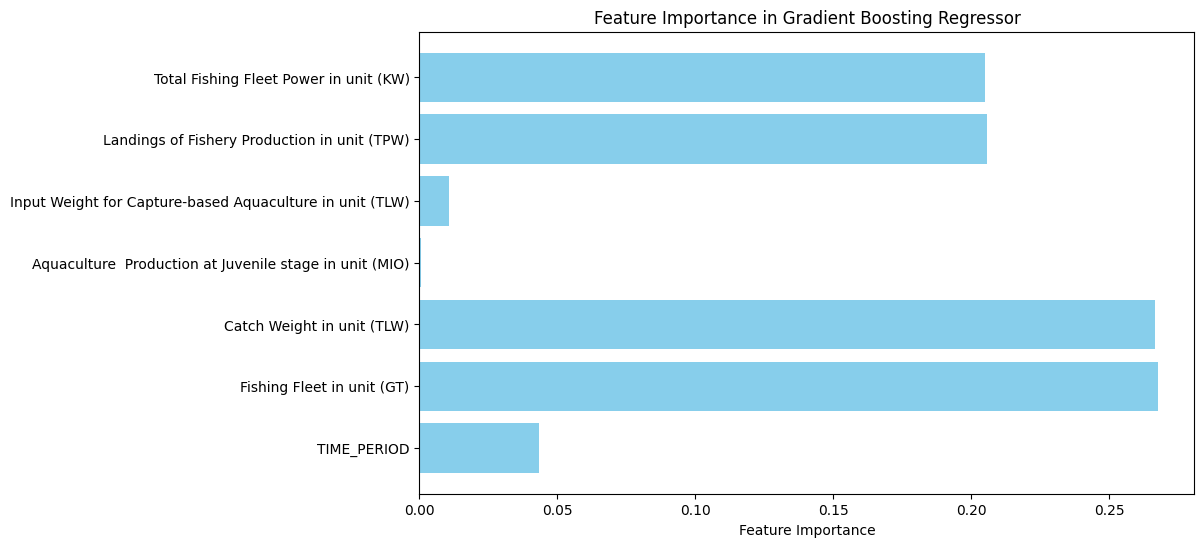

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize gbr
gbr = GradientBoostingRegressor(random_state=42)

# Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best R² score after tuning
print("Best parameters:", grid_search.best_params_)
print("Best R² score from Grid Search:", grid_search.best_score_)

# Update model with best found parameters
gbr_best = grid_search.best_estimator_

# Cross-Validation to check consistency
cv_scores = cross_val_score(gbr_best, X_train, y_train, cv=3, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average Cross-Validation R² Score:", np.mean(cv_scores))

# Feature Importance Analysis
gbr_best.fit(X_train, y_train)
feature_importances = gbr_best.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting Regressor")
plt.show()


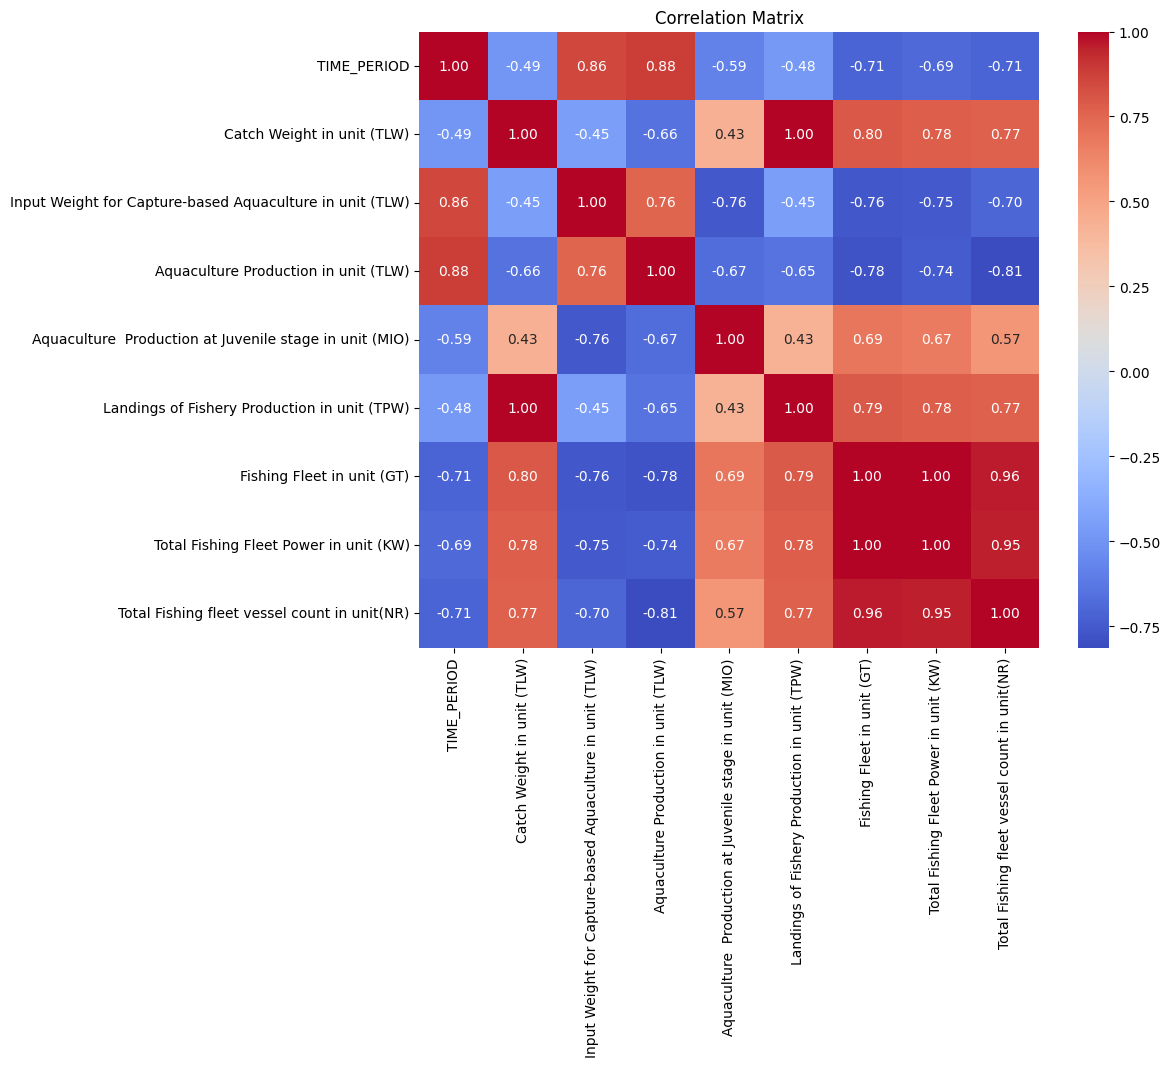

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


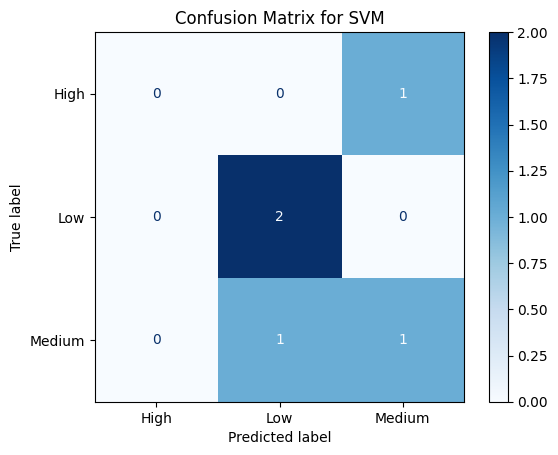

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


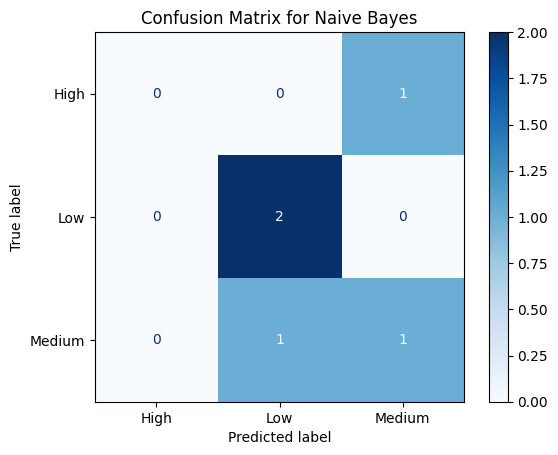

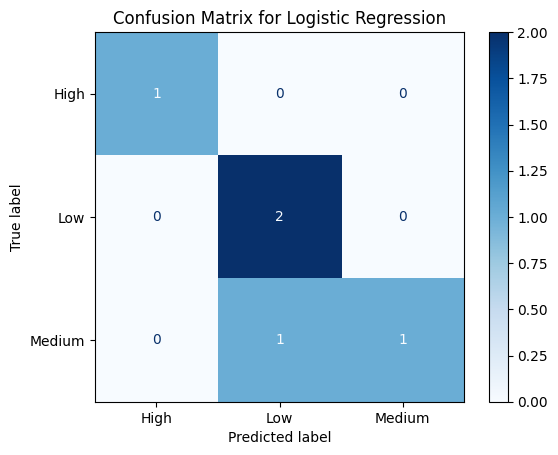

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


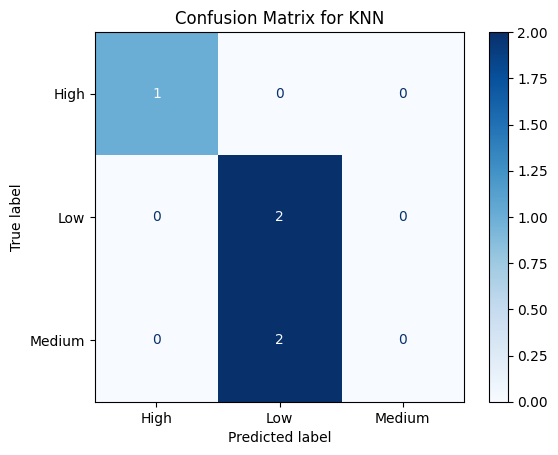


SVM Metrics:
Training Accuracy: 0.7143
Training F1 Score: 0.7143
Test Accuracy: 0.6000
Test F1 Score: 0.5200
Precision: 0.4667
Recall: 0.6000

Naive Bayes Metrics:
Training Accuracy: 0.7143
Training F1 Score: 0.7143
Test Accuracy: 0.6000
Test F1 Score: 0.5200
Precision: 0.4667
Recall: 0.6000

Logistic Regression Metrics:
Training Accuracy: 0.8571
Training F1 Score: 0.8476
Test Accuracy: 0.8000
Test F1 Score: 0.7867
Precision: 0.8667
Recall: 0.8000

KNN Metrics:
Training Accuracy: 0.7143
Training F1 Score: 0.6190
Test Accuracy: 0.6000
Test F1 Score: 0.4667
Precision: 0.4000
Recall: 0.6000


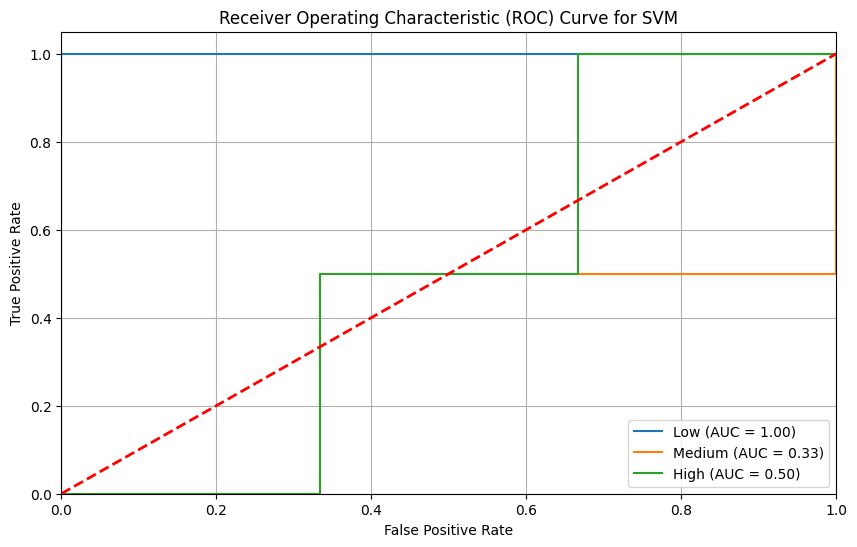

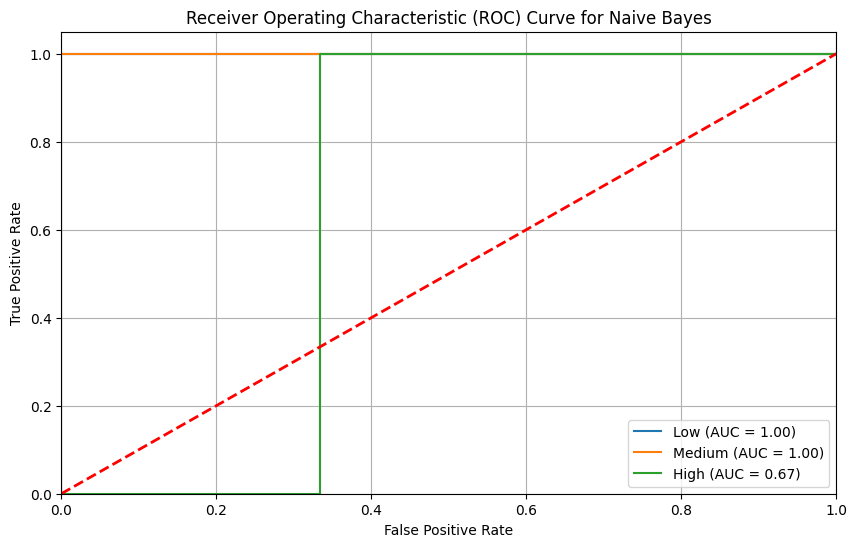

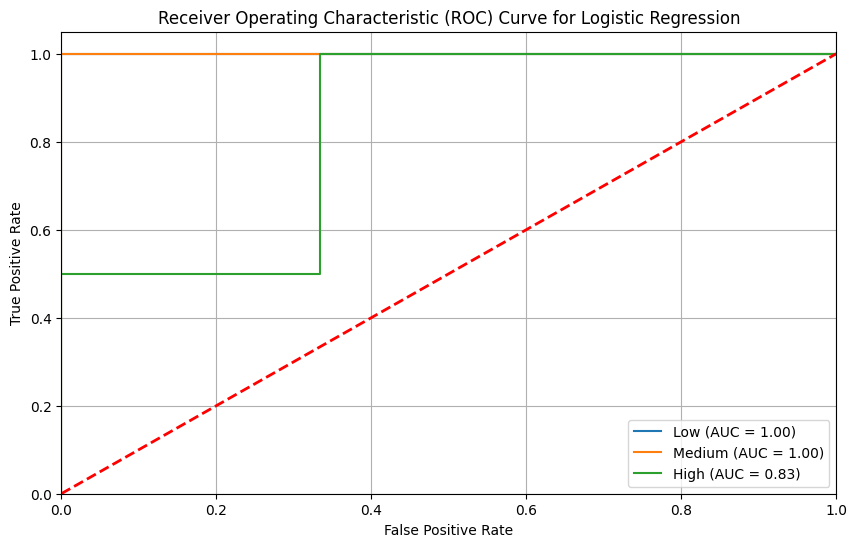

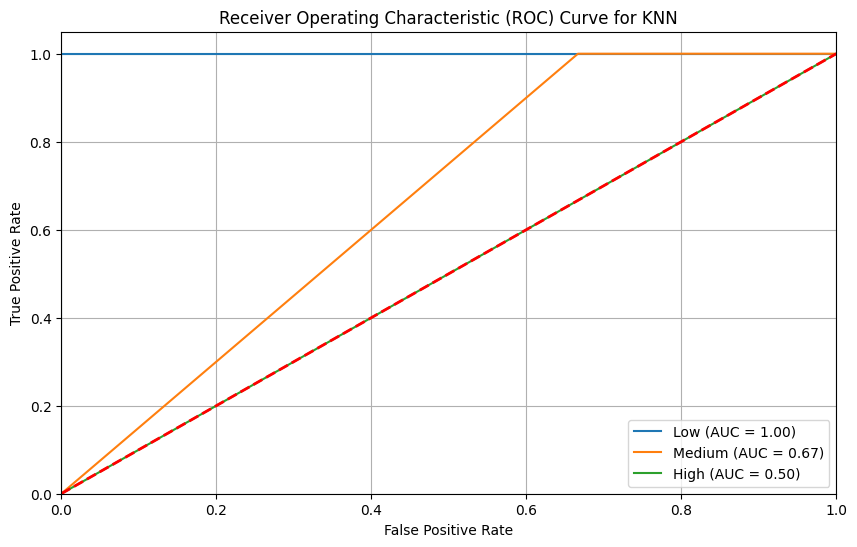

"\n# Forecasting with Prophet\n# Prepare the dataset for Prophet\n# Ensure that the DataFrame has a 'Year' and 'Total Fishing fleet vessel count in unit(NR)'\n# Assuming that we have a 'TIME_PERIOD' column for years; we will aggregate it for time series\ndf_prophet = df.groupby('TIME_PERIOD')['Total Fishing fleet vessel count in unit(NR)'].mean().reset_index()\n\n# Prepare data for Prophet\ndf_prophet.rename(columns={'TIME_PERIOD': 'ds', 'Total Fishing fleet vessel count in unit(NR)': 'y'}, inplace=True)\n\n# Instantiate a Prophet model\nprophet_model = Prophet()\n\n# Fit the model\nprophet_model.fit(df_prophet)\n\n# Create a DataFrame to hold future dates (5 years ahead)\nfuture = prophet_model.make_future_dataframe(periods=5, freq='Y')\n\n# Make predictions\nforecast = prophet_model.predict(future)\n\n# Plot the results\nfig = prophet_model.plot(forecast)\n\n# Add titles and labels\nplt.title('Forecast of Total Fishing Fleet Vessel Count Over the Next 5 Years')\nplt.xlabel('Year')\np

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
#from prophet import Prophet  # Import Prophet for forecasting


df = pd.read_csv('/content/clipped_dataset.csv')

# Drop unwanted features
df.drop(columns=['Aquaculture  Production at Juvenile stage in unit (MIO)',
                 'Input Weight for Capture-based Aquaculture in unit (TLW)'], inplace=True)

# Define target variable using percentile-based binning
quantiles = df['Total Fishing fleet vessel count in unit(NR)'].quantile([0, 0.33, 0.66, 1]).to_list()
labels = ['Low', 'Medium', 'High']
df['Target'] = pd.cut(df['Total Fishing fleet vessel count in unit(NR)'], bins=quantiles, labels=labels, include_lowest=True)

# Features for modeling
features = df[['Fishing Fleet in unit (GT)',
                'Landings of Fishery Production in unit (TPW)',
                'Total Fishing Fleet Power in unit (KW)']]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df['Target'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.4, random_state=42)

# Initialize models with simpler configuration
models = {
    "SVM": SVC(probability=True),  # Support Vector Machine
    "Naive Bayes": GaussianNB(),   # Gaussian Naive Bayes
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Logistic Regression with default L2 regularization
    "KNN": KNeighborsClassifier()  # K-Nearest Neighbors
}

# Train, test, and collect metrics for each model
metrics = {}

for model_name, model in models.items():
    # Create a pipeline with standardization
    pipeline = make_pipeline(StandardScaler(), model)

    # Train the model and predict on training and test sets
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate metrics for training and test sets
    metrics[model_name] = {
        "Training Accuracy": accuracy_score(y_train, y_train_pred),
        "Training F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test F1 Score": f1_score(y_test, y_test_pred, average='weighted'),
        "Precision": precision_score(y_test, y_test_pred, average='weighted'),
        "Recall": recall_score(y_test, y_test_pred, average='weighted'),
    }

    # Calculate and display the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Display all metrics
for model_name, metric in metrics.items():
    print(f"\n{model_name} Metrics:")
    for key, value in metric.items():
        print(f"{key}: {value:.4f}")

# Plot ROC Curves for each model
for model_name, model in models.items():
    plt.figure(figsize=(10, 6))  # Create a new figure for each model
    # Create a pipeline with standardization for ROC curve plotting
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)

    # Get probabilities for all classes
    y_pred_proba = pipeline.predict_proba(X_test)

    # Calculate ROC for each class
    for j, label in enumerate(labels):
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, j], pos_label=j)
        roc_auc = auc(fpr, tpr)

        # Plotting the ROC curve for each class
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    # Plot the diagonal line for random chance
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

    # Set plot details
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
'''
# Forecasting with Prophet
# Prepare the dataset for Prophet
# Ensure that the DataFrame has a 'Year' and 'Total Fishing fleet vessel count in unit(NR)'
# Assuming that we have a 'TIME_PERIOD' column for years; we will aggregate it for time series
df_prophet = df.groupby('TIME_PERIOD')['Total Fishing fleet vessel count in unit(NR)'].mean().reset_index()

# Prepare data for Prophet
df_prophet.rename(columns={'TIME_PERIOD': 'ds', 'Total Fishing fleet vessel count in unit(NR)': 'y'}, inplace=True)

# Instantiate a Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(df_prophet)

# Create a DataFrame to hold future dates (5 years ahead)
future = prophet_model.make_future_dataframe(periods=5, freq='Y')

# Make predictions
forecast = prophet_model.predict(future)

# Plot the results
fig = prophet_model.plot(forecast)

# Add titles and labels
plt.title('Forecast of Total Fishing Fleet Vessel Count Over the Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Total Fishing Fleet Vessel Count (NR)')
plt.grid()
plt.show()

# Display forecast data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))  # Show the last 10 predictions'''


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


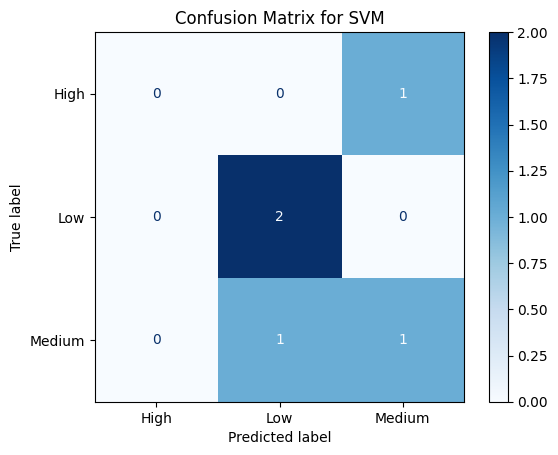

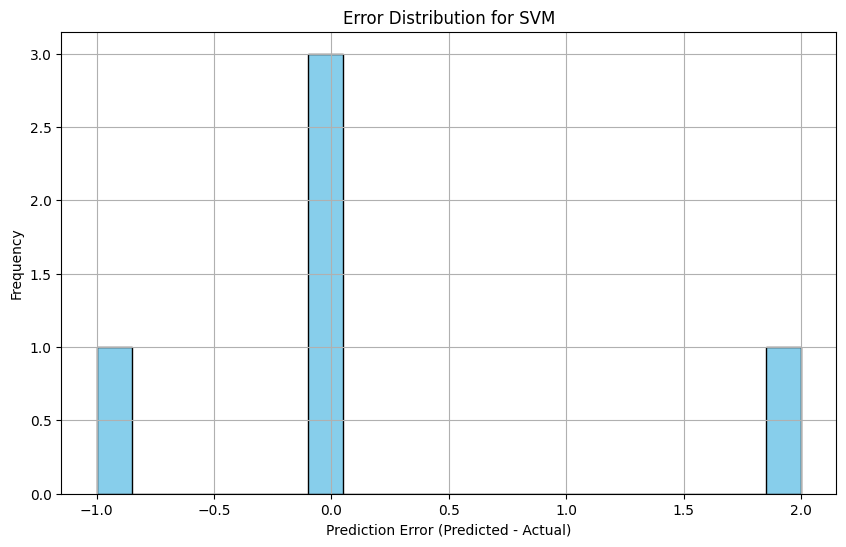

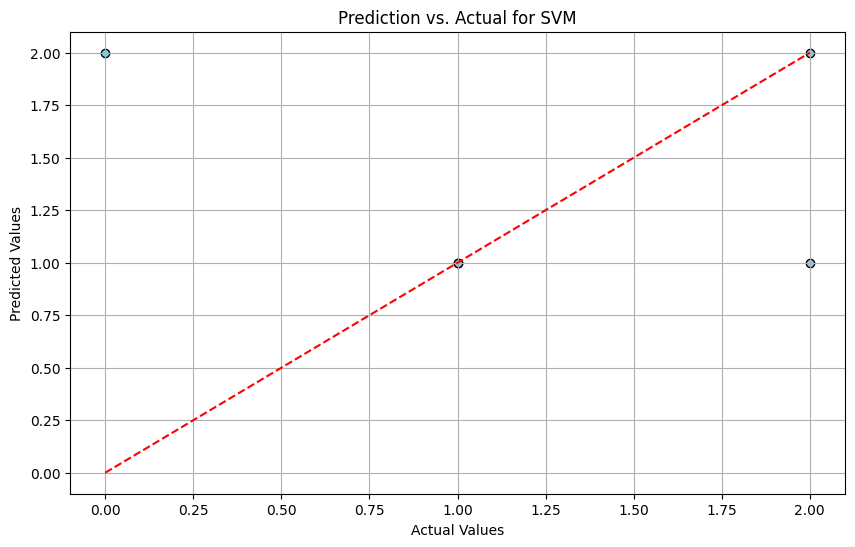

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


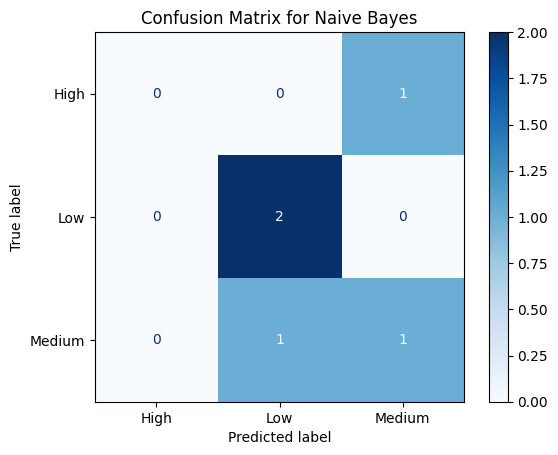

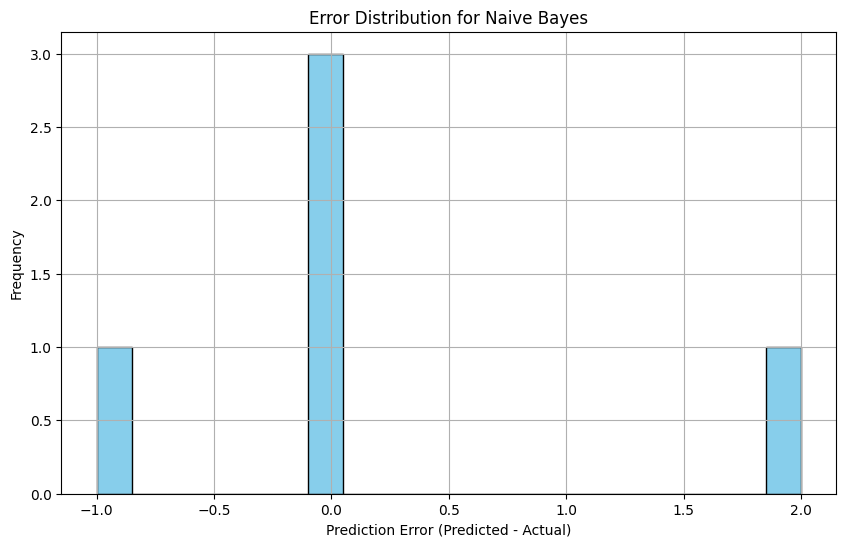

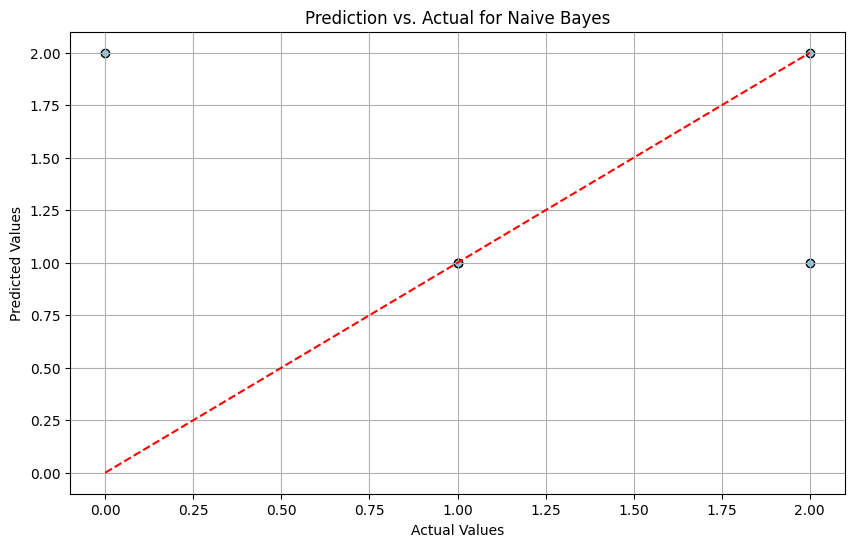

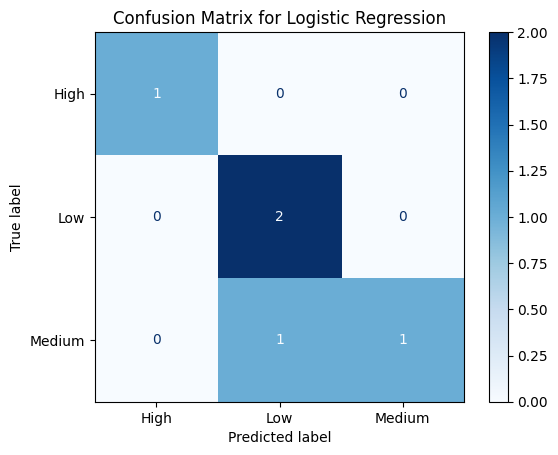

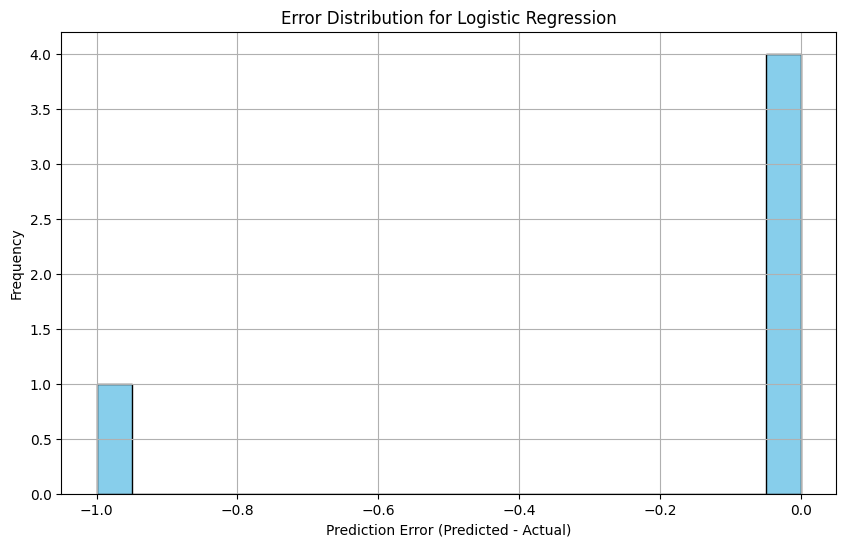

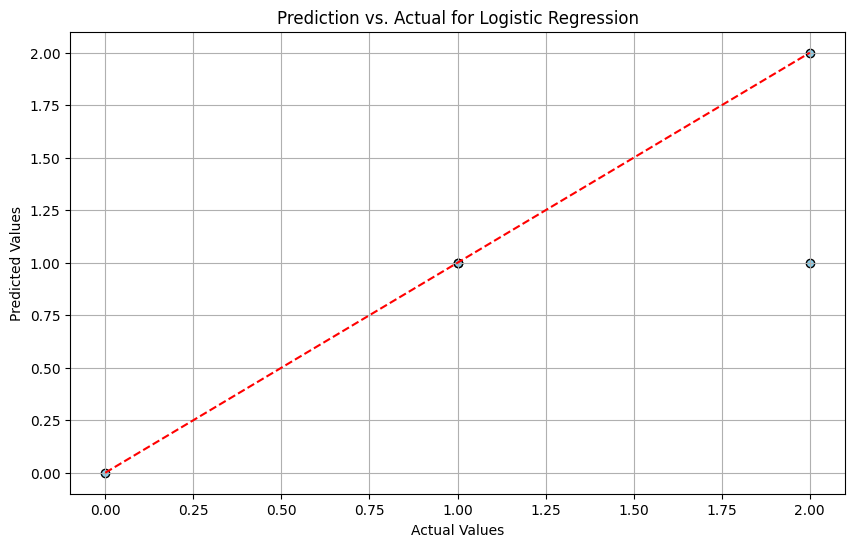

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


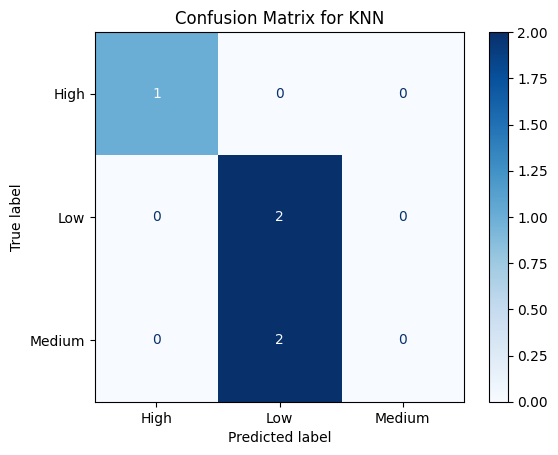

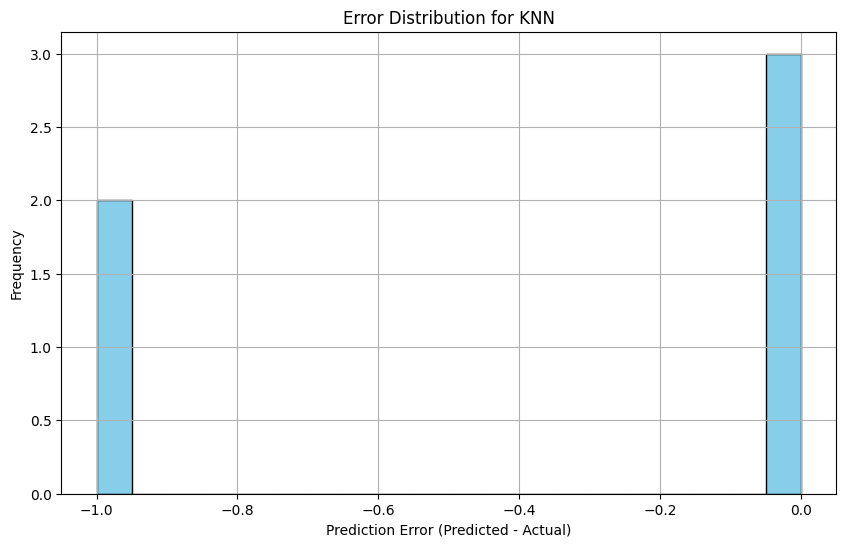

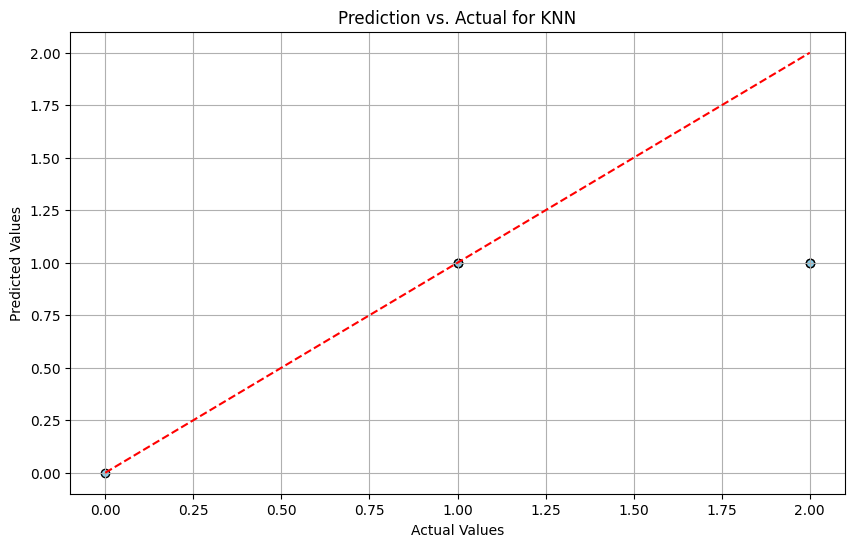


SVM Metrics:
Training Accuracy: 0.7143
Training F1 Score: 0.7143
Test Accuracy: 0.6000
Test F1 Score: 0.5200
Precision: 0.4667
Recall: 0.6000

Naive Bayes Metrics:
Training Accuracy: 0.7143
Training F1 Score: 0.7143
Test Accuracy: 0.6000
Test F1 Score: 0.5200
Precision: 0.4667
Recall: 0.6000

Logistic Regression Metrics:
Training Accuracy: 0.8571
Training F1 Score: 0.8476
Test Accuracy: 0.8000
Test F1 Score: 0.7867
Precision: 0.8667
Recall: 0.8000

KNN Metrics:
Training Accuracy: 0.7143
Training F1 Score: 0.6190
Test Accuracy: 0.6000
Test F1 Score: 0.4667
Precision: 0.4000
Recall: 0.6000


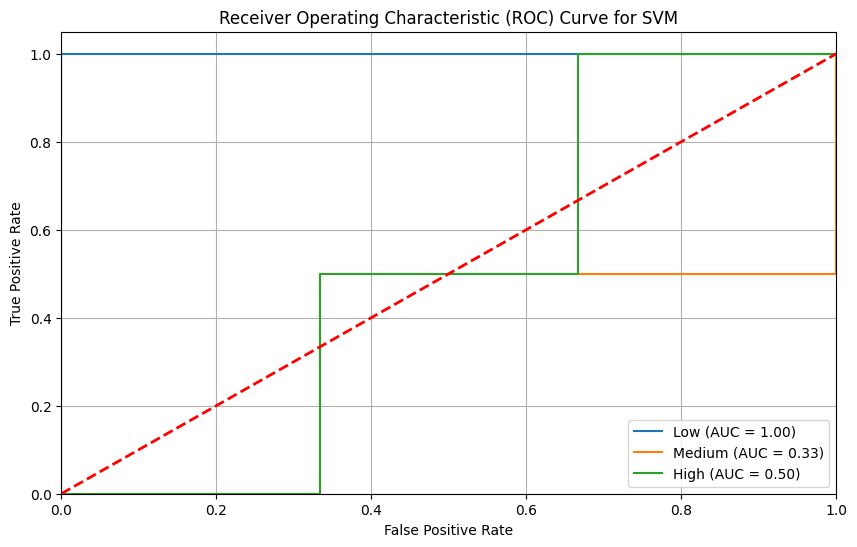

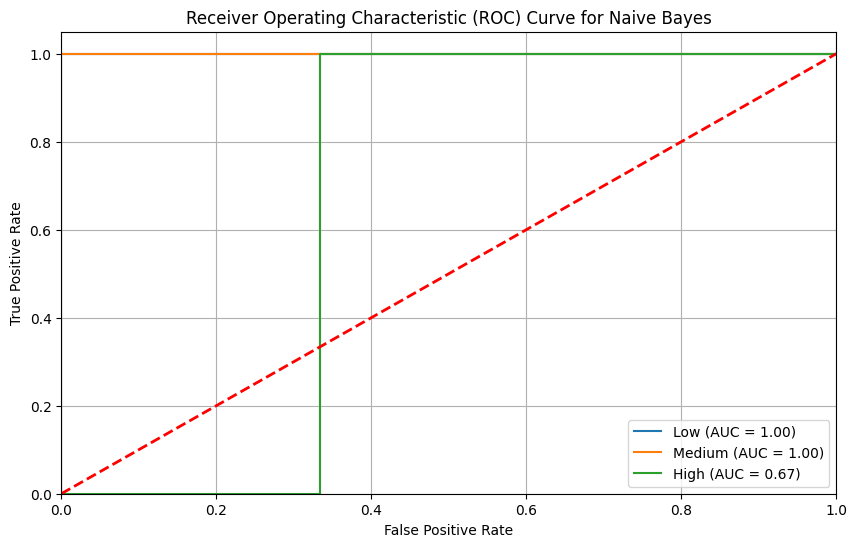

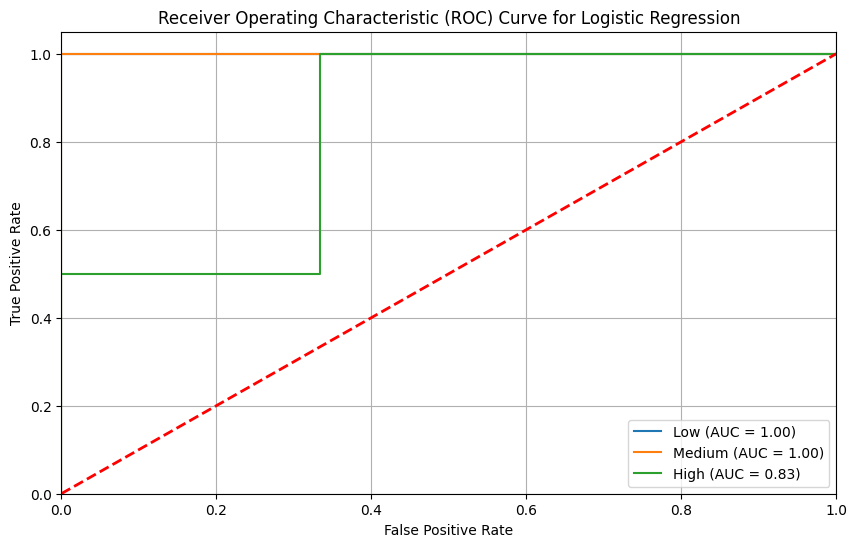

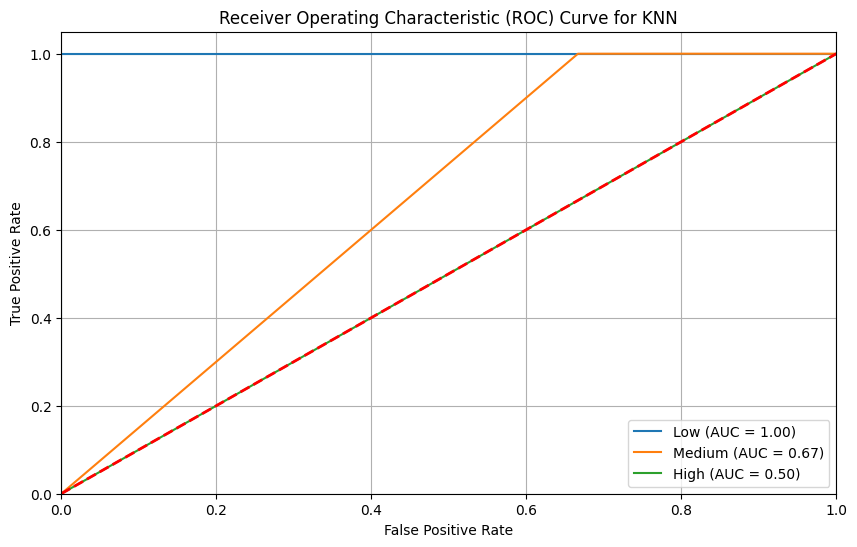

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

df = pd.read_csv('/content/clipped_dataset.csv')

# Drop unwanted features
df.drop(columns=['Aquaculture  Production at Juvenile stage in unit (MIO)',
                 'Input Weight for Capture-based Aquaculture in unit (TLW)'], inplace=True)

# Define target variable using percentile-based binning
quantiles = df['Total Fishing fleet vessel count in unit(NR)'].quantile([0, 0.33, 0.66, 1]).to_list()
labels = ['Low', 'Medium', 'High']
df['Target'] = pd.cut(df['Total Fishing fleet vessel count in unit(NR)'], bins=quantiles, labels=labels, include_lowest=True)

# Features for modeling
features = df[['Fishing Fleet in unit (GT)',
                'Landings of Fishery Production in unit (TPW)',
                'Total Fishing Fleet Power in unit (KW)']]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df['Target'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.4, random_state=42)

# Initialize models with simpler configuration
models = {
    "SVM": SVC(probability=True),  # Support Vector Machine
    "Naive Bayes": GaussianNB(),   # Gaussian Naive Bayes
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Logistic Regression with default L2 regularization
    "KNN": KNeighborsClassifier()  # K-Nearest Neighbors
}

# Train, test, and collect metrics for each model
metrics = {}

for model_name, model in models.items():
    # Create a pipeline with standardization
    pipeline = make_pipeline(StandardScaler(), model)

    # Train the model and predict on training and test sets
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate metrics for training and test sets
    metrics[model_name] = {
        "Training Accuracy": accuracy_score(y_train, y_train_pred),
        "Training F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test F1 Score": f1_score(y_test, y_test_pred, average='weighted'),
        "Precision": precision_score(y_test, y_test_pred, average='weighted'),
        "Recall": recall_score(y_test, y_test_pred, average='weighted'),
    }

    # Calculate and display the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Plot Error Distribution
    errors = y_test_pred - y_test
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Error Distribution for {model_name}')
    plt.xlabel('Prediction Error (Predicted - Actual)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Prediction vs Actual Plot (For regression models or numeric targets)
    if len(np.unique(y)) > 2:  # Only applicable for regression or continuous output models
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_test_pred, color='skyblue', edgecolor='black')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
        plt.title(f'Prediction vs. Actual for {model_name}')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.grid(True)
        plt.show()

# Display all metrics
for model_name, metric in metrics.items():
    print(f"\n{model_name} Metrics:")
    for key, value in metric.items():
        print(f"{key}: {value:.4f}")

# Plot ROC Curves for each model
for model_name, model in models.items():
    plt.figure(figsize=(10, 6))  # Create a new figure for each model
    # Create a pipeline with standardization for ROC curve plotting
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)

    # Get probabilities for all classes
    y_pred_proba = pipeline.predict_proba(X_test)

    # Calculate ROC for each class
    for j, label in enumerate(labels):
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, j], pos_label=j)
        roc_auc = auc(fpr, tpr)

        # Plotting the ROC curve for each class
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    # Plot the diagonal line for random chance
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

    # Set plot details
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
